Importing the important libraries to be used in this project.

In [2]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


In [8]:
#reading the file 
df=pd.read_csv("Heat_loading_dataset.csv")

Using pd.read_csv() function of pandas library to Read a comma-separated values (csv) file into DataFrame and storing the dataframe in df variable. 

In [9]:
df.head(5)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,C3,1.19,622.55,NaN,89.31,7.00,1.98,0.0,0.0,15.55
1,C1,1.19,622.55,323.40,109.15,7.70,3.00,0.0,0.0,15.55
2,C1,0.88,463.05,291.06,99.23,5.67,4.40,0.0,0.0,15.55
3,C2,0.79,509.36,291.06,121.28,6.30,4.05,0.0,0.0,15.55
4,C1,0.89,507.15,385.39,121.28,7.70,2.00,0.0,0.0,20.84


Printing the first 5 rows of dataframe using head() function to know about data

In [10]:
#renaming the headings to understand data clearly
df = df.rename(columns = {"X0":"CategoryBuilding"})
df = df.rename(columns = {"X1":"RelativeCompactness"})
df = df.rename(columns = {"X2":"SurfaceArea"})
df = df.rename(columns = {"X3":"WallArea"})
df = df.rename(columns = {"X4":"RoofArea"})
df = df.rename(columns = {"X5":"OverallHeight"})
df = df.rename(columns = {"X6":"Orientation"})
df = df.rename(columns = {"X7":"GlazingArea"})
df = df.rename(columns = {"X8":"GlazingAreaDistribution"})
df = df.rename(columns = {"Y":"HeatingLoad"})

Renaming the column names by using rename function of dataframe. we pass parameters in dict, key is existing column name and value is name that will replace the existing column  name



In [11]:
#<----------DATA INSPECTION--------->

#checking shape of data
df.shape

(768, 10)

Using shape() function to data to know about rows and columns in our dataset. It returns tuple, first value is total rows and second value of tuple is total columns in dataset

In [12]:
#getting the statistics of data using describe function
df.describe()

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad
count,768.000000,768.000000,728.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.763516,666.768997,321.102527,176.564141,5.229766,3.527331,0.237852,2.803737,22.307201
std,0.147093,120.863329,60.479340,51.280618,1.844813,1.245710,0.139736,1.597817,10.090196
min,0.500000,416.740000,198.450000,89.310000,2.840000,1.620000,0.000000,0.000000,6.010000
25%,0.650000,575.510000,277.830000,132.300000,3.470000,2.427500,0.100000,1.517500,12.992500
50%,0.750000,661.500000,315.320000,178.235000,4.955000,3.600000,0.240000,2.970000,18.950000
75%,0.860000,741.130000,355.740000,218.300000,6.930000,4.425000,0.360000,3.960000,31.667500
max,1.190000,978.290000,503.970000,266.800000,8.470000,6.050000,0.480000,6.050000,43.100000


Using describe() function of dataframe to get statistics of each column of datasets.

In [13]:
#getting info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CategoryBuilding         768 non-null    object 
 1   RelativeCompactness      768 non-null    float64
 2   SurfaceArea              768 non-null    float64
 3   WallArea                 728 non-null    float64
 4   RoofArea                 768 non-null    float64
 5   OverallHeight            768 non-null    float64
 6   Orientation              768 non-null    float64
 7   GlazingArea              768 non-null    float64
 8   GlazingAreaDistribution  768 non-null    float64
 9   HeatingLoad              768 non-null    float64
dtypes: float64(9), object(1)
memory usage: 60.1+ KB


Using info() function of dataframe to know datatype of each column of dataset, class of dataframe,column numbers and memory usage

In [14]:
#transposing the data to know about datatypes
df.head().T

,0,1,2,3,4
CategoryBuilding,C3,C1,C1,C2,C1
RelativeCompactness,1.19,1.19,0.88,0.79,0.89
SurfaceArea,622.55,622.55,463.05,509.36,507.15
WallArea,NaN,323.4,291.06,291.06,385.39
RoofArea,89.31,109.15,99.23,121.28,121.28
OverallHeight,7.0,7.7,5.67,6.3,7.7
Orientation,1.98,3.0,4.4,4.05,2.0
GlazingArea,0.0,0.0,0.0,0.0,0.0
GlazingAreaDistribution,0.0,0.0,0.0,0.0,0.0
HeatingLoad,15.55,15.55,15.55,15.55,20.84


Using df.T to get transpose of dataframe, using head() function will transpose only first five rows. 

array([[<AxesSubplot:title={'center':'HeatingLoad'}>]], dtype=object)

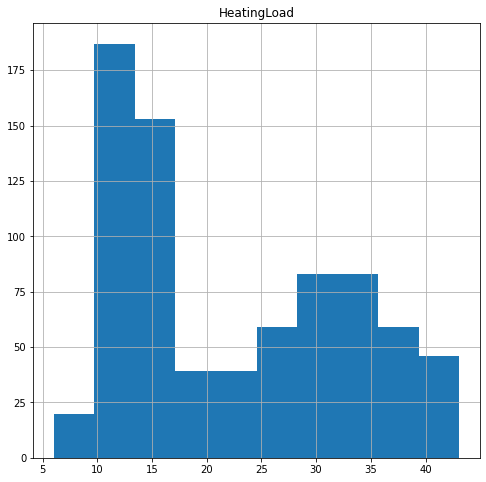

In [15]:
#data visualization to check the skewness of data, we can see it is Right skewed
df.hist(column='HeatingLoad',figsize=(8,8))


ploting the histogram of column 'heatingLoad' using df.hist() function to know about distribution of data. The dataset is right skewed meaning the mean is greater than the median for specific column data.

In [16]:
# Check missing values, we can see that only WallArea has 40 missing values
df.isna().sum()

CategoryBuilding            0
RelativeCompactness         0
SurfaceArea                 0
WallArea                   40
RoofArea                    0
OverallHeight               0
Orientation                 0
GlazingArea                 0
GlazingAreaDistribution     0
HeatingLoad                 0
dtype: int64

Using isna().sum() function to count NULL values in each column. All the columns in the dataset have no Null value except column 'WallArea' that has 40 NAN values.

In [17]:
#<---------------DATA PREPROCESSING--------->

# as we know that we have few missing values in WallArea so we will fill them with median
df.fillna(df['WallArea'].median(), inplace = True)


Using df.fillna() function to fill all the NAN values with the median of column 'WallArea' to improve the quality of data to be used in ML algorithms.Data is skewed so replacing NAN wth median is good approach

In [18]:
#we know that categoryBuilding contains categorical values, so to avoid errors while training models we will encode those values
#importing OrdinalEncoder from sklearn library
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df["CategoryBuilding"] = ord_enc.fit_transform(df[["CategoryBuilding"]])
df.head(2)

,CategoryBuilding,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad
0,2.0,1.19,622.55,315.32,89.31,7.0,1.98,0.0,0.0,15.55
1,0.0,1.19,622.55,323.40,109.15,7.7,3.00,0.0,0.0,15.55


Most of the Machine learning algorithms don't accept categorical values and generate errors on run so to get rid of Errors, we are replacing the categorical values in CategoryBuilding by ordinal values. Each categorical value will be assigned one ordinal value. 
For this purpose,imported OrdinalEncoder of preprocessing sklearn model, created a instance named 'ord_enc, fit_transform() function will fit data of specific column and transform it to ordinal numbers

In [19]:
#creating two dataframes that contains predictors and outcomes
X=df.drop(['HeatingLoad'],axis=1)
Y=df['HeatingLoad']

#from sklearn we will import train_test_split to split the data into training and testing datasets
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train, y_test = train_test_split(X,Y,test_size =0.30, random_state=42)


Initializing two dataframes X,Y. X dataframe will contain all predictors columns whereas Y will contain the outcome variable.
For creating X dataframe, we are using drop() function which is used to drop specific column from dataframe.
To train and test the dataset, data spliting is performed on these dataframes. For this,importing train_test_split module from sklearn model selection module. Using train_test_split() function to split the dataset into training and testing datasets.
parameter test_size = 0.30 indicates that data will split in ratio of 30% testing and 70% of training dataset

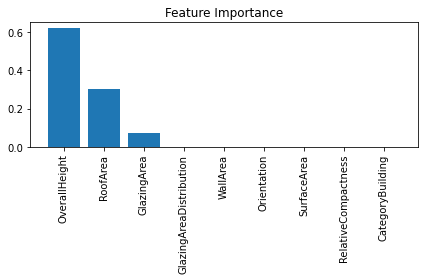

In [20]:
#now we will do the feature importance to know important features in dataset using randomForestRegressor
from sklearn.ensemble import RandomForestRegressor

#initializing the estimator for randomforest regressor
regr = RandomForestRegressor(max_depth=2, random_state=0)

#training the model on training dataset using fit function
regr.fit(x_train,y_train.values.ravel())

#we will use feature_importances_ function of RandomForest
importances = regr.feature_importances_

# Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]

 
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()


To do Feature Engineering, importing RandomForestRegressor from sklearn library. we will train the model using fit() function by passing training dataset.
On trained model, using function feature_importances_ returns feature importance of each column. It returns numpy array,Sorting the variables in descending order using np.argsort() function. Using bar() function of matplotlib to plot the values of feature importance for each column.



In [21]:
#standardizing the data
from sklearn.preprocessing import StandardScaler
#Creating StandardScaler Object
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Before applying ML algorithms , standardizing the data using StandardScaler Module of sklearn library. Created a instance of StandardScaler to fit the data and transform it into standardized dataset.
fit_transform() function is used to fit and transform data of training dataset containing attributes data.
transform() function is used to perform scaling of testing dataset  containing attributes data.

In [22]:
#WE see that only RoofArea, OverallHeight and GlazingArea contributes much so we will use only these features

#creating a new dataframe containing only these values and outcome variable
extract_data = pd.DataFrame(columns=['RoofArea','OverallHeight','GlazingArea','GlazingAreaDistribution','HeatingLoad'])

#adding data to these columns
extract_data['RoofArea']=df['RoofArea']
extract_data['OverallHeight']=df['OverallHeight']
extract_data['GlazingArea']=df['GlazingArea']
extract_data['GlazingAreaDistribution']=df['GlazingAreaDistribution']
extract_data['HeatingLoad']=df['HeatingLoad']

#creating two dataframes that contains predictors and outcomes
X=df.drop(['HeatingLoad'],axis=1)
Y=df['HeatingLoad']

#now spliting this dataset into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train, y_test = train_test_split(X,Y,test_size =0.30, random_state=42)

After feature importance, we will select only those values which contributes more in predicting outcomes. We are creating a df named extract_data in which we are storing the data of only important features.we are assigning all values of column of df dataframe to extract_data dataframe.
We will split this dataframe into testing and training dataset that will be used by ML algorithms.


In [23]:
#Lists to store Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
Mean_absolute_Error=[]
Mean_Square_Error=[]
Root_mean_square_Error=[]
model_names=[]
y_intercept=[]

#importing metrics to calculate its values
from sklearn import metrics
def statistical_calculation(y_pred,model_name):
    Mean_absolute_Error.append(round(metrics.mean_absolute_error(y_train, y_pred),3))
    Mean_Square_Error.append(round(metrics.mean_squared_error(y_train, y_pred),3))
    Root_mean_square_Error.append(np.sqrt(Mean_Square_Error))
    model_names.append(model_name)
    
    

Creating empty list to store values of models,y_intercept.MSE,RMSE,ABE. statistical function() will be called after training and testing each model to calculate its statistics. parameter y_pred is array of predictions of each model on training dataset.

In [26]:
#we will use Randomized Search for hyperparameter Tuning of each model except Linear Regression

#this dict will store best params of each model
best_scores={}
from sklearn.model_selection import GridSearchCV
def Grid_Search_ftn(model,param_distributions,model_name):
    
    model_random_search = GridSearchCV(
    model, param_grid=param_distributions,
    cv=5)
    
    model_random_search.fit(x_train, y_train)
    best_scores[model_name]={
                             'best_params':model_random_search.best_params_
                            }
    
    

To tune our model, we are using GridSearchCV to find  best possible combinations. dict bes_scores will add best params of all models. key will be model name and its value will be best params.
Grid_search_ftn() is user defined function that will be called for each model except linear and polynomial regression.we are passing the searce space, model name and trained model to this function to find best paramters.
The parameter cv stands  for cross validation, param_grid is search space and model is trained model for each regressor.

In [27]:
#Now we are done with preprocessing and feature engineering step, we will move to train different models and test the datasets
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_train)
y_intercept.append(regressor.intercept_)
statistical_calculation(y_pred,"Linear Regression")


Importing LinearRegression from sklearn library, initializing a estimator named regressor on which we are training the model using training dataset. We have tested the model on same dataset using predict() function and calculated its statistics by passing it to statistical_calculation function

In [28]:
#Ridge Regression
from sklearn.linear_model import Ridge
clf = Ridge()
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500,1000,1200]}
Grid_Search_ftn(clf,ridge_params,"Ridge")


In [264]:
best_scores

{'Ridge': {'best_params': {'alpha': 200}}}

Importing Ridge from sklearn library, initializing a estimator and search space i.e ridge_params and passed it to function to apply GridSearch and printed the best scores 

In [29]:
#Now using best param, we will train and test model on training dataset
clf=Ridge(alpha=200)
clf.fit(x_train,y_train)
y_intercept.append(clf.intercept_)
y_pred = clf.predict(x_train)
statistical_calculation(y_pred,"Ridge Regression")

After getting best scores, re initializing the estimator with hyperparameters and fit and tested the model on training dataset.Calculated its statistical values by passing it to function

In [30]:
#Lasso Regression
from sklearn import linear_model
clf1 = linear_model.Lasso()
lasso_params={'alpha':[0.005, 0.02, 0.03, 0.05, 0.06]}
Grid_Search_ftn(clf1,lasso_params,"Lasso")


In [31]:
best_scores

{'Ridge': {'best_params': {'alpha': 200}},
 'Lasso': {'best_params': {'alpha': 0.005}}}

Importing linear_model from sklearn library, initializing a estimator  and search space i.e lasso_params and passed it to function to apply GridSearch and printed the best scores

In [32]:
#Now using best param, we will train and test model on training dataset
#Lasso Regression
clf1 = linear_model.Lasso(alpha=0.005)
clf1.fit(x_train,y_train)
y_intercept.append(clf1.intercept_)
y_pred = clf1.predict(x_train)
statistical_calculation(y_pred,"Lasso Regression")

After getting best scores, re initializing the estimator with hyperparameters and fit and tested the model on training dataset.Calculated its statistical values by passing it to function

In [33]:
#Applying Hyperparameter tuning for Elastic Net
#Elastic Net Regression
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=0)
params = {"max_iter": [1, 5, 10],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}
Grid_Search_ftn(regr,params,"ElasticNet")


C:\Users\Zohaib\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.664e+03, tolerance: 4.372e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Zohaib\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.049e+03, tolerance: 4.194e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.lin

Importing ElasticNet from sklearn library, initializing a estimator and search space i.e params and passed it to function to apply GridSearch and printed the best scores

In [34]:
best_scores

{'Ridge': {'best_params': {'alpha': 200}},
 'Lasso': {'best_params': {'alpha': 0.005}},
 'ElasticNet': {'best_params': {'alpha': 0.0001,
   'l1_ratio': 0.0,
   'max_iter': 10}}}

In [36]:
regr = ElasticNet(max_iter=10,l1_ratio=0.0,alpha=0.0001)
regr.fit(x_train,y_train)
y_intercept.append(regr.intercept_)
y_pred = regr.predict(x_train)
statistical_calculation(y_pred,"Elastic Net Regression")

C:\Users\Zohaib\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.509e+03, tolerance: 5.455e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


After getting best scores, re initializing the estimator with hyperparameters and fit and tested the model on training dataset.Calculated its statistical values by passing it to function

In [37]:
from sklearn.neural_network import MLPRegressor
estimator=MLPRegressor()
param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,1)],
          'activation': ['relu','tanh','logistic'],
          'alpha': [0.0001, 0.05],
          }
Grid_Search_ftn(estimator,param_grid,"MLP_Regressor")


C:\Users\Zohaib\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Zohaib\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Zohaib\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Zohaib\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Zohaib\anaconda3\lib\site-packages\sklearn\neural_network\_

In [38]:
best_scores

{'Ridge': {'best_params': {'alpha': 200}},
 'Lasso': {'best_params': {'alpha': 0.005}},
 'ElasticNet': {'best_params': {'alpha': 0.0001,
   'l1_ratio': 0.0,
   'max_iter': 10}},
 'MLP_Regressor': {'best_params': {'activation': 'tanh',
   'alpha': 0.0001,
   'hidden_layer_sizes': (50, 50, 50)}}}

Importing MLPRegressor from neural network sklearn library, initializing a estimator and search space and passed it to function to apply GridSearch and printed the best scores

In [39]:
#Multilayer perceptron Regression
regr = MLPRegressor(random_state=1,hidden_layer_sizes=(50,100,50),alpha=0.0001,activation='tanh')
regr.fit(x_train,y_train)
y_intercept.append(' ')
y_pred=regr.predict(x_train)
statistical_calculation(y_pred,"MLP Regressor")

C:\Users\Zohaib\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


After getting best scores, re initializing the estimator with hyperparameters and fit and tested the model on training dataset.Calculated its statistical values by passing it to function

In [42]:
#Polynomial Regression with Regularization
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
#create new features
poly_features = poly.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(poly_features,Y, test_size=0.3, random_state=42)
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, Y_train)
y_pred = poly_reg_model.predict(X_train)
y_intercept.append(poly_reg_model.intercept_)
statistical_calculation(y_pred,"Polynomial Regression")

Importing PolynomialFeatures from sklearn library,creating instance of PolynomialFeatures ( degree=2 means we are working with 2nd degree polynomial). fit_transform() function is used to create new features by fitting the model and transforming the data.After that, created a instance of LinearRegression model, fitting the data of newly created features and tested the model on training dataset of polynomial features and calculated its statistical values

In [43]:
#printing performances of all models in table.
d=[]
print('Evaluation of models on training dataset')
for i in range(0,len(model_names)):
    d.append([model_names[i],Mean_absolute_Error[i],Mean_Square_Error[i],y_intercept[i]])

DF = pd.DataFrame(d, columns = ['models','Mean_Absolute_error','Mean_Square_Error','y_intercept'])
print(DF)

Evaluation of models on training dataset
                   models  Mean_Absolute_error  Mean_Square_Error y_intercept
0       Linear Regression                3.461             20.454    7.644479
1       Linear Regression                3.461             20.454    7.644479
2        Ridge Regression                3.998             27.584   17.116293
3        Lasso Regression                3.459             20.458    7.247136
4  Elastic Net Regression                3.472             20.479     8.98309
5  Elastic Net Regression                3.472             20.479     8.98309
6           MLP Regressor                3.698             26.712            
7   Polynomial Regression                2.995             15.114    14.67619


After training of model, we will print the lists containing model name,MSE,MBE and y_intercept to visualize the performance of each model on training dataset.

In [44]:
#Trained all the models on training dataset and measured performance of each, we will choose only two models that have good performance to test it on testing dataset

#polynomial regression, linear regression performed best than rest of the models

y_pred_test = poly_reg_model.predict(X_test)
y_pred=regressor.predict(x_test)

scores={
    "Polynomial Regression": {
        "Mean_absolute_Error" : round(metrics.mean_absolute_error(Y_test, y_pred_test),3),
        "Mean_Square_Error" : round(metrics.mean_squared_error(Y_test, y_pred_test),3)
    },
    "Linear Regression": {
        "Mean_absolute_Error" : round(metrics.mean_absolute_error(y_test, y_pred),3),
        "Mean_Square_Error" : round(metrics.mean_squared_error(y_test, y_pred),3)
        
    }
}




Evaluated the models in terms of MSE,ABE and selected two best models i.e linear Regressor and Polynomial Regressor.Tested the models on testing dataset and calculated its MSE,ABE values.

In [45]:
scores

{'Polynomial Regression': {'Mean_absolute_Error': 3.177,
  'Mean_Square_Error': 16.938},
 'Linear Regression': {'Mean_absolute_Error': 3.258,
  'Mean_Square_Error': 19.178}}

Printing the performance of best models on testing dataset